In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

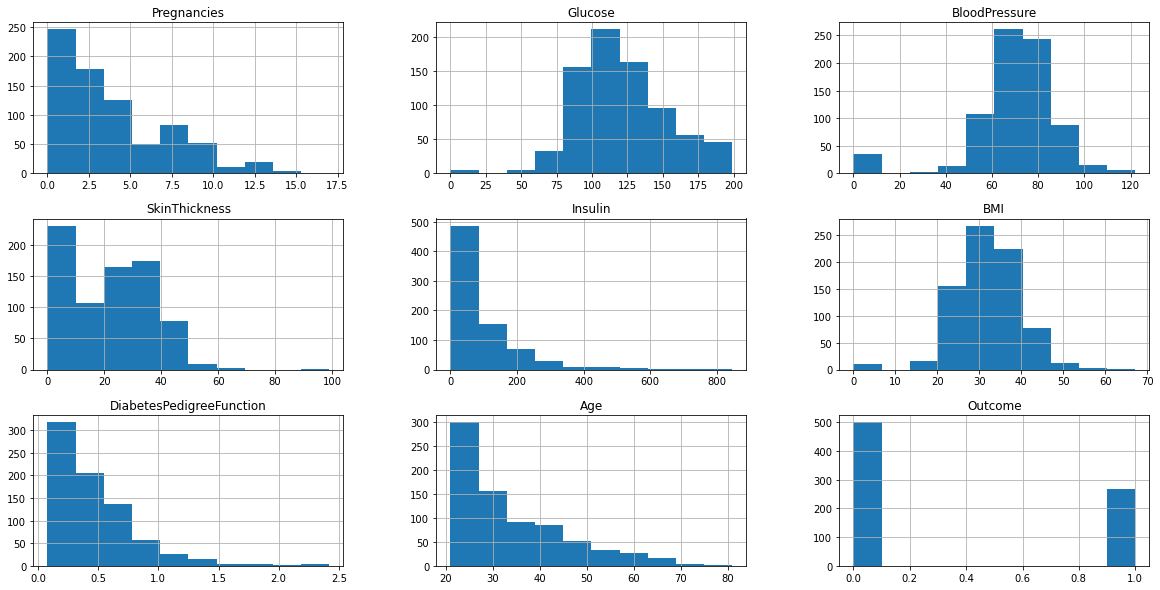

In [4]:
diabetes.hist(figsize=(20,10));


In [7]:
D_count = diabetes.Outcome.value_counts()

class 0: 500
class 1: 268
proportion: 1.87 :1


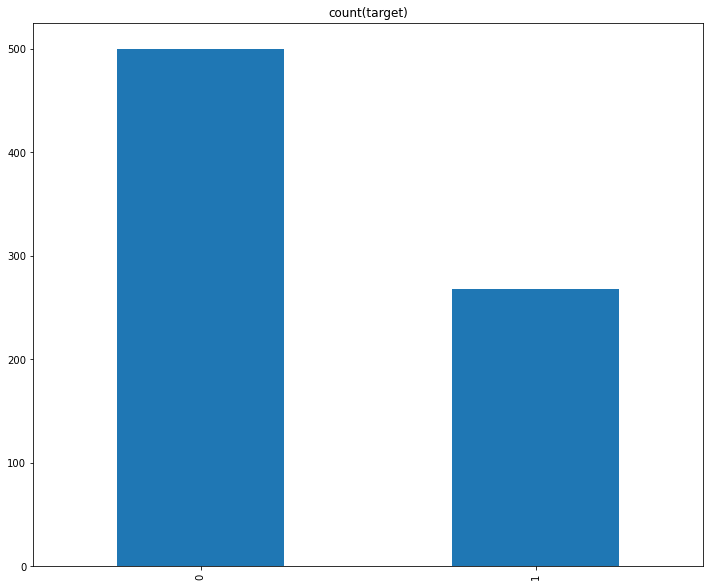

In [8]:
print('class 0:',D_count[0])
print('class 1:',D_count[1])
print('proportion:',round(D_count[0]/D_count[1],2),':1')
D_count.plot(kind='bar',title='count(target)',figsize=(12,10));

In [9]:
y=diabetes.Outcome
x=diabetes.drop('Outcome',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state=27)

In [13]:
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression(solver='liblinear')

In [14]:
logistic_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [15]:
y_pred = logistic_model.predict(x_test)

In [16]:
pd.crosstab(y_pred,y_test)

Outcome,0,1
row_0,,
0,111,31
1,19,31


In [17]:
from sklearn import metrics

In [18]:
metrics.accuracy_score(y_test,y_pred)

0.7395833333333334

metrics.precision(y_test,y_pred)

In [20]:
metrics.precision_score(y_test,y_pred)

0.62

In [22]:
metrics.recall_score(y_test,y_pred)

0.5

In [23]:
x=pd.concat([x_train,y_train],axis=1)

In [25]:
x=x.reset_index(drop=True)

In [30]:
non_diabetic = diabetes[diabetes.Outcome==0]
diabetic = diabetes[diabetes.Outcome==1]

In [31]:
from sklearn.utils import resample

In [33]:
over_sampled= resample(diabetic,replace=True,n_samples= len(non_diabetic),random_state=27)

In [34]:
over_sampled = pd.concat([non_diabetic,over_sampled])
over_sampled = over_sampled.reset_index(drop=True)

In [35]:
over_sampled.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,0,167,0,0,0,32.3,0.839,30,1
362,8,110,76,0,0,27.8,0.237,58,0
124,1,105,58,0,0,24.3,0.187,21,0
942,7,100,0,0,0,30.0,0.484,32,1
696,9,171,110,24,240,45.4,0.721,54,1


In [37]:
D_count = over_sampled.Outcome.value_counts()

class 0: 500
class 1: 500
proportion: 1.0 :1


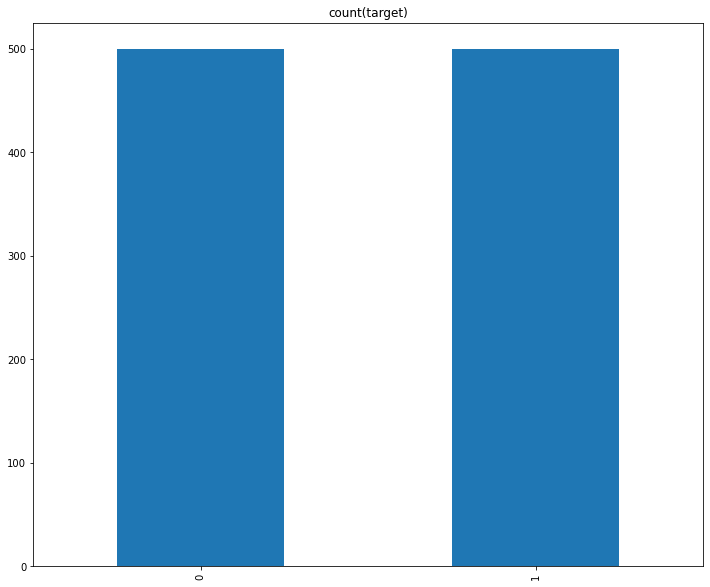

In [38]:
print('class 0:',D_count[0])
print('class 1:',D_count[1])
print('proportion:',round(D_count[0]/D_count[1],2),':1')
D_count.plot(kind='bar',title='count(target)',figsize=(12,10));

In [44]:
y=over_sampled.Outcome
x=over_sampled.drop('Outcome',axis=1)

In [45]:
logistic_model = LogisticRegression(solver='liblinear')

In [46]:
logistic_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [47]:
y_pred = logistic_model.predict(x_test)

In [48]:
pd.crosstab(y_pred,y_test)

Outcome,0,1
row_0,,
0,111,31
1,19,31


In [50]:
metrics.accuracy_score(y_test,y_pred)

0.7395833333333334

In [51]:
metrics.precision_score(y_test,y_pred)

0.62

In [52]:
metrics.recall_score(y_test,y_pred)

0.5